# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress
from citipy import citipy

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_city = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [18]:
# cities

In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:

# set up lists to hold reponse info
country = []
date = []
lat = []
lng = []
temp = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
    except:
        print(f"The Country information received is: {country}")
        print(f"The Date information received is: {date}")
        print(f"The Latitude information received is: {lat}")
        print(f"The Longitude information received is: {lng}")
        print(f"The Temperature information received is: {temp}")
        print(f"The Temperature information received is: {temp_max}")
        print(f"The Humidity information received is: {humidity}")
        print(f"The Cloudiness information received is: {cloudiness}")
        print(f"The Wind_speed information received is: {wind_speed}")
        
        pass

The Country information received is: ['ID', 'CL']
The Date information received is: [1624087832, 1624087833]
The Latitude information received is: [4.4683, -28.5708]
The Longitude information received is: [97.9683, -70.7581]
The Temperature information received is: [84.51, 52.68]
The Temperature information received is: [84.51, 52.68]
The Humidity information received is: [68, 60]
The Cloudiness information received is: [78, 0]
The Wind_speed information received is: [7.54, 3.44]
The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 1624087418, 1624087419, 1624087420, 1624087420, 1624087421, 1624087422, 1624087422, 1624087423, 1624087424, 1624087425

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 1624087418, 1624087419, 1624087420, 1624087420, 1624087421, 1624087422, 1624087422, 1624087423, 1624087424, 1624087425, 1624087426, 1624087426, 1624087427, 1624087428, 1624087429, 1624087229, 1624087430, 1624087431, 1624087848, 1624087432, 1624087433, 1624087433, 1624087434, 1624087435, 1624087435, 1624087317, 1624087437, 1624087439, 1624087439, 1624087440, 1624087441, 1624087441, 1624087442, 1624087443, 1624087444, 1624087208, 1624087446, 1624087446]
The Latitude information received is: [4.4683, -28.5708, 71.2906, -46.1927, -20.4

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 1624087418, 1624087419, 1624087420, 1624087420, 1624087421, 1624087422, 1624087422, 1624087423, 1624087424, 1624087425, 1624087426, 1624087426, 1624087427, 1624087428, 1624087429, 1624087229, 1624087430, 1624087431, 1624087848, 1624087432, 1624087433, 1624087433, 1624087434, 1624087435, 1624087435, 1624087317, 1624087437, 1624087439, 1624087439, 1624087440, 1624087441, 1624087441, 1624087442, 1624087443, 162408744

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 1624087418, 1624087419, 1624087420, 1624087420, 1624087421, 1624087422, 1624087422, 1624087423, 1624087424, 1624087425, 1624087426, 1624087426, 1624087427, 1624087428, 1624087429, 1624087229, 1624087430, 1624087431, 1624087848, 1624087432, 162

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 1624087418, 1624087419, 1624087420, 1624087420, 1624087421, 1624087422, 1624087422, 1624087423, 1624087424, 1624087425, 1624087426, 1624087426, 1624087427, 1624087428, 162408742

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 1624087418, 1624087419, 1624087420, 1624087420, 1624087421, 1624087422, 1624087422, 162408742

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 1624087418, 1624087419, 162

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 1624087414, 1624087415, 1624087416, 1624087417, 1624087417, 162408741

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN']
The Date information received is: [1624087832, 1624087833, 1624087413, 1624087414, 162

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

The Country information received is: ['ID', 'CL', 'US', 'NZ', 'MU', 'TO', 'SJ', 'GL', 'CA', 'VU', 'AU', 'NA', 'US', 'GL', 'CA', 'PG', 'EC', 'PK', 'PF', 'RO', 'NG', 'CL', 'BR', 'CA', 'AR', 'CF', 'BR', 'US', 'RU', 'PT', 'SA', 'BR', 'BR', 'RU', 'AU', 'US', 'NU', 'RU', 'PT', 'US', 'RU', 'US', 'AU', 'PH', 'US', 'KZ', 'BB', 'US', 'IN', 'CA', 'ZA', 'IR', 'ZA', 'RU', 'RU', 'ID', 'MM', 'PW', 'MV', 'PF', 'RU', 'PT', 'AU', 'BR', 'CA', 'GL', 'MG', 'RU', 'MX', 'RU', 'RU', 'AU', 'PF', 'RU', 'CL', 'KI', 'ML', 'US', 'RU', 'CN', 'DJ', 'CA', 'PT', 'MX', 'US', 'RU', 'ES', 'US', 'BS', 'PG', 'AU', 'CN', 'HN', 'US', 'MX', 'AU', 'NA', 'BR', 'MA', 'GL', 'AR', 'ZA', 'NC', 'TR', 'PG', 'PH', 'CH', 'BR', 'CK', 'FR', 'US', 'NZ', 'RU', 'PK', 'PE', 'MU', 'RU', 'CA', 'IS', 'CL', 'RU', 'BR', 'ZA', 'US', 'GL', 'RU', 'MY', 'BW', 'JP', 'IS', 'CA', 'RU', 'ZA', 'ZA', 'IT', 'IN', 'RU', 'PG', 'BR', 'GR', 'LR', 'LK', 'QA', 'SB', 'PT', 'CN', 'US', 'IT', 'SO', 'ID', 'MY', 'NG', 'RU', 'NO', 'AU', 'TR', 'IS', 'JP', 'JP', 'RU', 'Z

In [24]:
# create a data frame for all the cities for their latitude, temperature, humidity, cloudiness and wind speed

city_data = {"City": cities,
             "Country": country,
             "Date":date,
            "Latitude": lat,
             "Longitude": lng,
             "Humidity": humidity,
            "Temperature": temp,
             "Temp Max" : temp_max,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed}

city_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in city_data.items() ])).dropna()
city_df 
# city_df.Latitude.describe


,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,langsa,ID,1.624088e+09,4.4683,97.9683,68.0,84.51,84.51,78.0,7.54
1,vallenar,CL,1.624088e+09,-28.5708,-70.7581,60.0,52.68,52.68,0.0,3.44
2,ijaki,US,1.624087e+09,71.2906,-156.7887,71.0,48.22,48.22,75.0,5.75
3,barrow,NZ,1.624087e+09,-46.1927,168.8643,96.0,41.49,41.49,14.0,3.71
4,mataura,MU,1.624087e+09,-20.4081,57.7000,69.0,77.29,77.29,40.0,6.91
...,...,...,...,...,...,...,...,...,...,...
539,ndele,GB,1.624088e+09,56.0380,-5.4321,87.0,56.01,57.18,100.0,1.81
540,shibarghan,AU,1.624088e+09,-13.8483,136.4192,64.0,73.27,73.27,85.0,8.05
541,concepcion,SA,1.624088e+09,25.0213,37.2685,61.0,85.50,85.50,0.0,14.20
542,sinnamary,RU,1.624088e+09,45.2333,147.8833,70.0,48.45,48.45,19.0,6.20


In [25]:
# export the data in .csv file to designated folder
city_df.to_csv("output_data/city-df.csv", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = city_df.loc[(city_df["Humidity"] < 100)]
city_humidity

,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,langsa,ID,1.624088e+09,4.4683,97.9683,68.0,84.51,84.51,78.0,7.54
1,vallenar,CL,1.624088e+09,-28.5708,-70.7581,60.0,52.68,52.68,0.0,3.44
2,ijaki,US,1.624087e+09,71.2906,-156.7887,71.0,48.22,48.22,75.0,5.75
3,barrow,NZ,1.624087e+09,-46.1927,168.8643,96.0,41.49,41.49,14.0,3.71
4,mataura,MU,1.624087e+09,-20.4081,57.7000,69.0,77.29,77.29,40.0,6.91
...,...,...,...,...,...,...,...,...,...,...
539,ndele,GB,1.624088e+09,56.0380,-5.4321,87.0,56.01,57.18,100.0,1.81
540,shibarghan,AU,1.624088e+09,-13.8483,136.4192,64.0,73.27,73.27,85.0,8.05
541,concepcion,SA,1.624088e+09,25.0213,37.2685,61.0,85.50,85.50,0.0,14.20
542,sinnamary,RU,1.624088e+09,45.2333,147.8833,70.0,48.45,48.45,19.0,6.20


In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The r-value is: 0.00026493386796607783


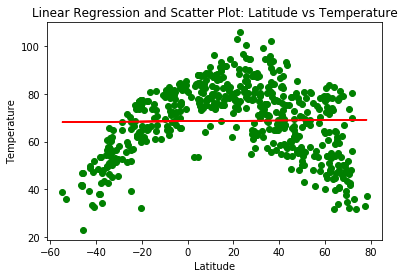

In [28]:
# create scatter plot for latitude vs temperatrure 
from datetime import date

# Create a Scatter Plot for temperature vs latitude
x_values = city_df["Latitude"]
y_values = city_df["Temperature"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
# plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Temperature")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs temp.png")

# Show plot
plt.show();


## Latitude vs. Humidity Plot

The r-value is: 0.04048414564557972


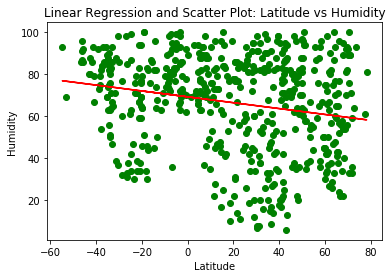

In [29]:
# create scatter plot for latitude vs humidity 
from datetime import date

# Create a Scatter Plot for temperature vs humidity
x_values = city_df["Latitude"]
y_values = city_df["Humidity"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on temperature vs. humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Humidity")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs humidity.png")

# Show plot
plt.show();

## Latitude vs. Cloudiness Plot

The r-value is: 0.006780608848355794


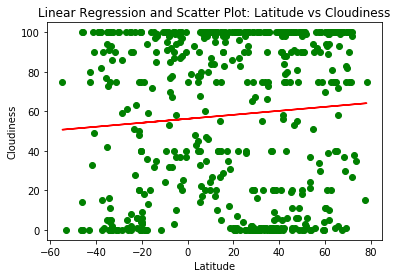

In [30]:
# create scatter plot for latitude vs Cloudiness
from datetime import date

# Create a Scatter Plot for temperature vs cloudiness
x_values = city_df["Latitude"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on temperature vs. cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Cloudiness")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs cloudiness.png")

# Show plot
plt.show();

## Latitude vs. Wind Speed Plot

The r-value is: 0.0033865707190565133


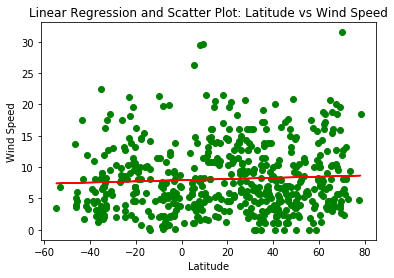

In [31]:
# create scatter plot for latitude vs wind speed
from datetime import date

# Create a Scatter Plot for temperature vs wind speed
x_values = city_df["Latitude"]
y_values = city_df["Wind Speed"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on temperature vs. wind speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot: Latitude vs Wind Speed")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/lat vs wind speed.png")
# Show plot
plt.show();

## Linear Regression

In [32]:
# generating northern hemisphere data frame

nth_hemi =  city_df.loc[(city_df['Latitude'] >= 0)]
nth_hemi

,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
0,langsa,ID,1.624088e+09,4.4683,97.9683,68.0,84.51,84.51,78.0,7.54
2,ijaki,US,1.624087e+09,71.2906,-156.7887,71.0,48.22,48.22,75.0,5.75
6,vaini,SJ,1.624087e+09,78.2186,15.6401,81.0,37.24,37.24,75.0,18.41
7,longyearbyen,GL,1.624087e+09,69.2167,-51.1000,70.0,39.22,39.22,1.0,3.44
8,ilulissat,CA,1.624087e+09,50.2001,-66.3821,96.0,54.05,54.12,90.0,3.44
...,...,...,...,...,...,...,...,...,...,...
536,san miguelito,AI,1.624088e+09,18.2170,-63.0578,77.0,81.00,81.10,12.0,21.47
538,skalistyy,US,1.624088e+09,33.6634,-116.3100,26.0,94.66,98.64,1.0,1.99
539,ndele,GB,1.624088e+09,56.0380,-5.4321,87.0,56.01,57.18,100.0,1.81
541,concepcion,SA,1.624088e+09,25.0213,37.2685,61.0,85.50,85.50,0.0,14.20


In [33]:
# generating southern hemisphere data frame

sth_hemi =  city_df.loc[(city_df['Latitude'] <= 0)]
sth_hemi

,City,Country,Date,Latitude,Longitude,Humidity,Temperature,Temp Max,Cloudiness,Wind Speed
1,vallenar,CL,1.624088e+09,-28.5708,-70.7581,60.0,52.68,52.68,0.0,3.44
3,barrow,NZ,1.624087e+09,-46.1927,168.8643,96.0,41.49,41.49,14.0,3.71
4,mataura,MU,1.624087e+09,-20.4081,57.7000,69.0,77.29,77.29,40.0,6.91
5,mahebourg,TO,1.624087e+09,-21.2000,-175.2000,94.0,73.56,73.56,20.0,4.61
9,sept-iles,VU,1.624087e+09,-13.8833,167.5500,74.0,81.41,81.41,35.0,14.09
...,...,...,...,...,...,...,...,...,...,...
522,meadow lake,CL,1.624088e+09,-36.7423,-72.2985,86.0,43.56,47.28,1.0,1.30
532,rosetta,PG,1.624088e+09,-5.5502,150.1429,87.0,77.79,77.79,100.0,0.78
537,antigonish,NA,1.624088e+09,-17.9333,19.7667,30.0,66.09,66.09,0.0,8.16
540,shibarghan,AU,1.624088e+09,-13.8483,136.4192,64.0,73.27,73.27,85.0,8.05


####  Northern Hemisphere -  Max Temprature vs. Latitude Linear Regression

The r-value is: 0.3902938057662662


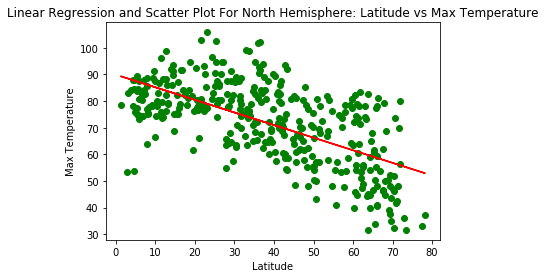

In [34]:
# create scatter plot for latitude vs Max Temperature
from datetime import date

# Create a Scatter Plot for latitude vs Max Temperature
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Temp Max"]
plt.scatter(x_values,y_values,color="green")
# plt.xlabel("Latitude")
# plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on latitude vs. Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Max Temperature")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs temp speed.png")
# Show plot
plt.show();

####  Southern Hemisphere -  Max Temprature vs. Latitude Linear Regression

The r-value is: 0.6613310533736415


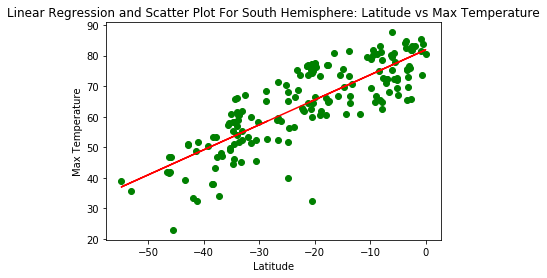

In [35]:
# create scatter plot for latitude vs Max Temperature
from datetime import date

# Create a Scatter Plot for latitude vs Max Temperature
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Temp Max"]
plt.scatter(x_values,y_values,color="green")
# plt.xlabel("Latitude")
# plt.ylabel("Temperature")
# plt.show()

# Perform a linear regression on latitude vs. Temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Max Temperature")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs temp.png")
# Show plot
plt.show();

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005087071717176755


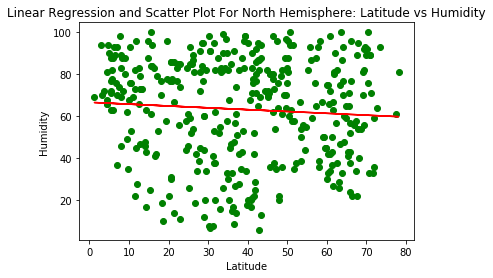

In [36]:
# create scatter plot for latitude vs Humidity
from datetime import date

# Create a Scatter Plot for latitude vs Humidity
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Humidity"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on latitude vs. Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Humidity")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs humidity.png")
# Show plot
plt.show();

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0008206867250569635


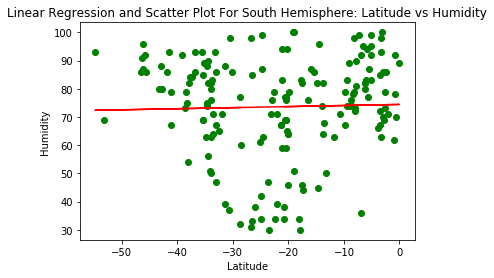

In [37]:
# create scatter plot for latitude vs Humidity
from datetime import date

# Create a Scatter Plot for latitude vs Humidity
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Humidity"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.show()

# Perform a linear regression on latitude vs. Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Humidity")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs humidity.png")
# Show plot
plt.show();

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005725689923336517


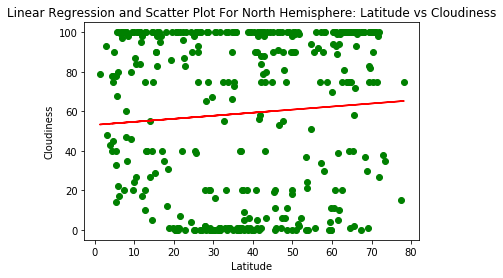

In [38]:
# create scatter plot for latitude vs Cloudiness
from datetime import date

# Create a Scatter Plot for latitude vs Cloudiness
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Cloudiness"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.show()

# Perform a linear regression on latitude vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Cloudiness")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs cloudiness.png")
# Show plot
plt.show();

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0380097815368928


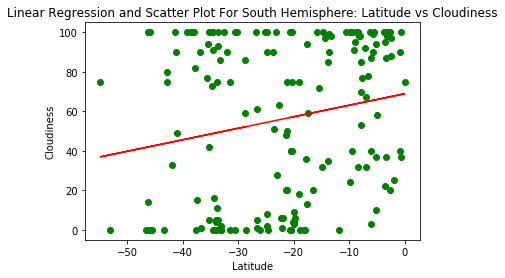

In [39]:
# create scatter plot for latitude vs Cloudiness
from datetime import date

# Create a Scatter Plot for latitude vs Cloudiness
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Cloudiness"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.show()

# Perform a linear regression on latitude vs. Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Cloudiness")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs cloudiness.png")
# Show plot
plt.show();

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0007401348453547282


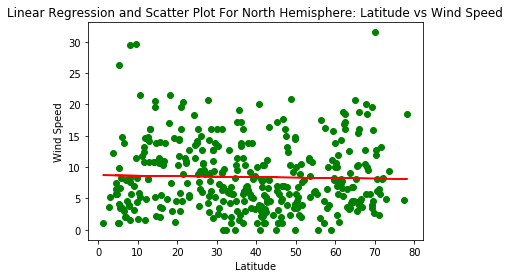

In [40]:
# create scatter plot for latitude vs Wind Speed
from datetime import date

# Create a Scatter Plot for latitude vs Wind Speed
x_values = nth_hemi["Latitude"]
y_values = nth_hemi["Wind Speed"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# plt.show()

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For North Hemisphere: Latitude vs Wind Speed")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/nth-hemi lat vs wind speed.png")
# Show plot
plt.show();

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0016327874872209722


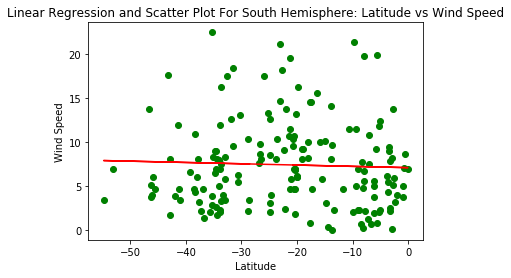

In [41]:
# create scatter plot for latitude vs Wind Speed
from datetime import date

# Create a Scatter Plot for latitude vs Wind Speed
x_values = sth_hemi["Latitude"]
y_values = sth_hemi["Wind Speed"]
plt.scatter(x_values,y_values,color="green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# plt.show()

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
# plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression and Scatter Plot For South Hemisphere: Latitude vs Wind Speed")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("output_data/sth-hemi lat vs wind speed.png")
# Show plot
plt.show();